<a href="https://colab.research.google.com/github/Ayo-folashade/mnist-image-classifier/blob/master/mnist_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Importing Libraries and Loading The MNIST Dataset**

In [ ]:
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
from keras.utils import to_categorical

# Load the training data
train_df = pd.read_csv('/kaggle/input/mnist-in-csv/mnist_train.csv')
train_df.head()


# **Data Preprocessing**

In [ ]:
# Split features and labels
X_train = train_df.iloc[:, 1:].values.astype('float32')
y_train = train_df.iloc[:, 0].values.astype('int32')

# Reshaping the data to images
X_train = X_train.reshape(-1, 28, 28, 1)

# Normalize pixel values
X_train = X_train /255.0

# One-hot encoding the labels
y_train = to_categorical(y_train)

# **Define and Compile the Model Architecture**

In [ ]:
# Define the model architecture
model = keras.Sequential([
    keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Flatten(),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

# **Compile and Train the Model**

In [ ]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=64)

Epoch 1/10
938/938 [==============================] - 25s 26ms/step - loss: 0.1876 - accuracy: 0.9440
Epoch 2/10
938/938 [==============================] - 24s 26ms/step - loss: 0.0581 - accuracy: 0.9819
Epoch 3/10
938/938 [==============================] - 24s 25ms/step - loss: 0.0416 - accuracy: 0.9868
Epoch 4/10
938/938 [==============================] - 24s 26ms/step - loss: 0.0316 - accuracy: 0.9903
Epoch 5/10
938/938 [==============================] - 24s 26ms/step - loss: 0.0245 - accuracy: 0.9926
Epoch 6/10
938/938 [==============================] - 24s 26ms/step - loss: 0.0205 - accuracy: 0.9934
Epoch 7/10
938/938 [==============================] - 24s 26ms/step - loss: 0.0149 - accuracy: 0.9953
Epoch 8/10
938/938 [==============================] - 24s 25ms/step - loss: 0.0131 - accuracy: 0.9955
Epoch 9/10
938/938 [==============================] - 24s 26ms/step - loss: 0.0109 - accuracy: 0.9962
Epoch 10/10
938/938 [==============================] - 24s 26ms/step - loss: 0.008

# **Evaluate the Model on Test Data**

In [ ]:
# Load the test data
test_df = pd.read_csv('/kaggle/input/mnist-in-csv/mnist_test.csv')

# Split features and labels
X_test = test_df.iloc[:, 1:].values.astype('float32')
y_test = test_df.iloc[:, 0].values.astype('int32')

# Reshaping the data to images
X_test = X_test.reshape(-1, 28, 28, 1)

# Normalizing pixel values
X_test = X_test /255.0

# One-hot encode the labels
y_test = to_categorical(y_test)

# Evaluate the model on test data
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f'Test accuracy: {accuracy:.4f}')


Test accuracy: 0.9895


# **Visualizing Predictions on Some Test Images**

313/313 [==============================] - 2s 5ms/step


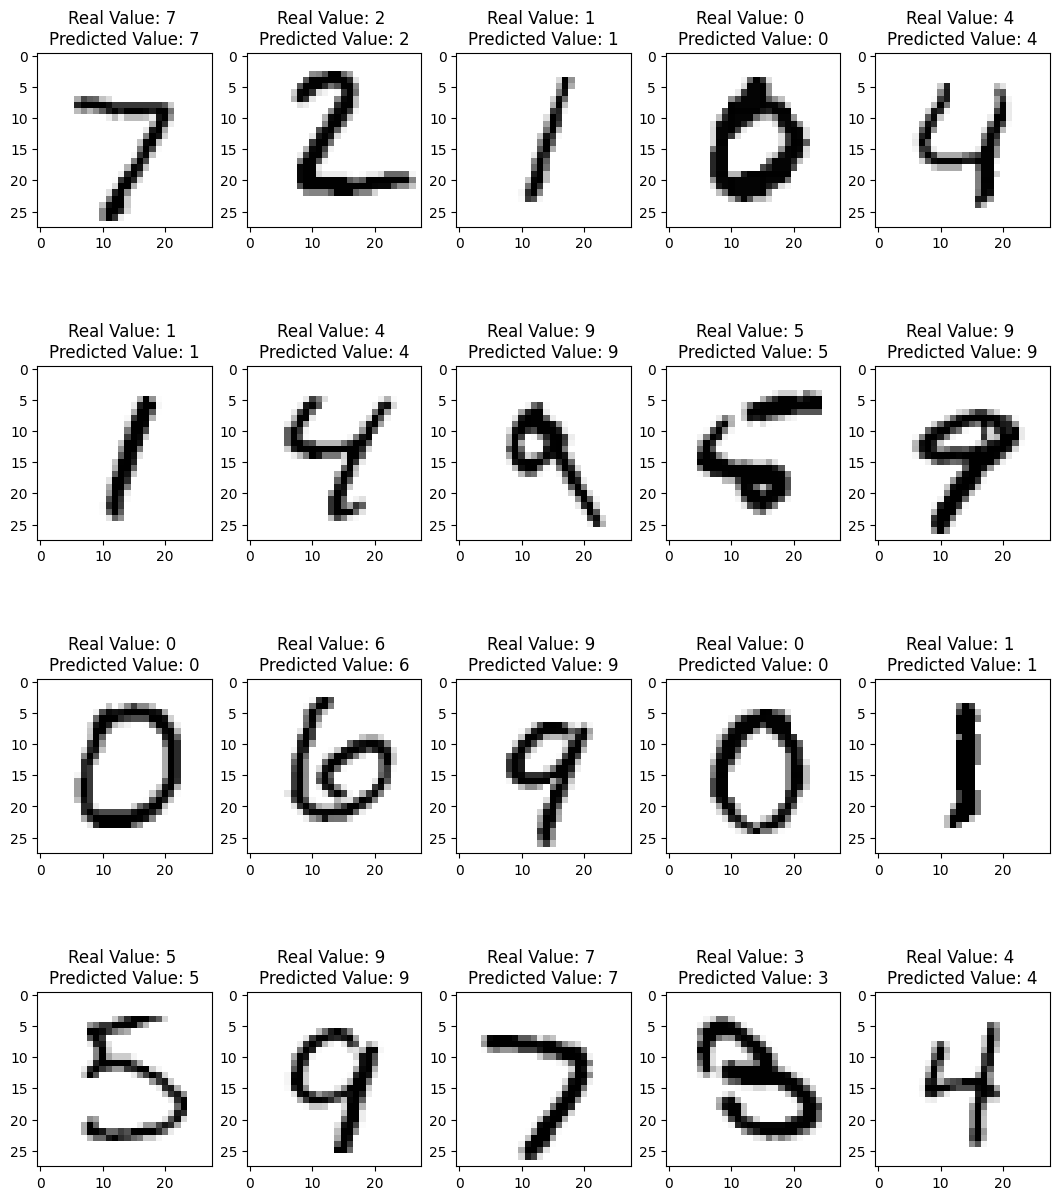

In [ ]:
# Visualizing the predictions
y_pred = np.argmax(model.predict(x_test), axis=-1)
y_list = np.argmax(y_test, axis=1)

plt.figure(figsize=(15, 20))
for i in range(20):
    plt.subplot(4, 5, i+1)
    some_val = x_test[i]
    some_val_image = some_val.reshape(28, 28)
    plt.imshow(some_val_image, cmap=mpl.cm.binary)
    plt.subplots_adjust(bottom=0.1, right=0.8, top=0.7)
    plt.title(f'Real Value: {y_list[i]} \n'+ f'Predicted Value: {y_pred[i]}')

!pip freeze > requirements.txt
